# Fehlerfortpflanzung

## Messverfahren

::::::{margin}
:::::{grid}
::::{grid-item-card}
:class-header: bg-light
Fehlerfortpflanzung nach Gauß berechnen (Jan Yellow)

<iframe width="200" height="113" src="https://www.youtube.com/embed/HWtwstR6XxE?si=2KA3A0hGNstRu7aD" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
::::
:::::
::::::

In der Messtechnik gibt es zwei Möglichkeiten eines Messprinzips:
* Das **direkte Messverfahren**: der gesuchte Messwert wird unmittelbar durch den Vergleich mit einem Bezugswert derselben Messgröße gewonnen. Als Beispiel eignet sich hier die Balkenwaage, die die unbekannte Masse $m$ mit der bekannten Masse eines Gewichtssteins vergleicht.
* Das **indirekt Messerverfahren**: Die meisten physikalischen Größen werden so ermittelt, da sie nur indirekt ermittelt werden können. Die gesuchte Messgröße wird hierbei über physikalische Zusammenhänge auf andere Größen zurückgeführt und anschließend aus diesen ermittelt. Die Federwaage ist ein Beispiel hierfür, bei der eine unbekannte Masse $m$ über die Auslenkung $x$ einer Feder (Federkonstante $k$) ermittelt werden soll. Gravitationskraft wird der Rückstellkraft der Feder gleichgesetzt und man erhält folgenden Zusammenhang, wobei $g$ die Schwerebeschleunigung ist. 

:::::{grid} 2

::::{grid-item}
:::{figure-md} waage
<img src="draw/waage.jpg" alt="waage" height="200px" label = waage>

Direktes Messverfahren, hier über Massenvergleich.
:::

$$m_\mathrm{unbekannt}  \overset{?}= m_\mathrm{bekannt}$$

::::

::::{grid-item}
:::{figure-md} waage2
<img src="draw/waage2.jpg" alt="waage2" height="200px" label = waage2>

Indirektes Messverfahren, hier über Federkonstante $k$.
:::

$$m \cdot g = k \cdot x \Rightarrow m = \frac{k \cdot x}{g}$$

::::

:::::

Durch dieses Beispiel wird klar, dass Messgrößen $y$ oft nicht direkt ermittelt werden, sondern über funktionelle Zusammenhänge von $n$ verschiedenen Messgrößen $x_i$ bestimmt werden:

$$ y = f(x_1, x_2, ...,x_n)$$

**Achtung**, bei $x_i$ handelt es sich nicht um Stichprobengrößen $x_j$, sondern um Messungen *unterschiedlicher* physikalischer Messgrößen, beispielsweise Federkonstante $k$ und Auslenkung $x$.


Die Messgrößen $x_i$ werden häufig mehrmals gemessen. Wir wissen bereits, dass es bei so einer Messreihe immer leicht unterschiedliche Werte heraus kommen und wir diese mit Methoden aus der [Statistik](1_StatistischeMessunsicherheit.ipynb) analysieren können. Wir wissen:

* als Messergebnisse kann man die jeweiligen Mittelwerte $\bar x_i$ einer Messreihe verwenden
* als Messunsicherheit dient die Standardabweichung $s(\bar x_i)$ der Mittelwerte, häufig erweitert mit $t$ zur Messunsicherheit $u(\bar x_1) = t \cdot s(\bar x_i) = t \cdot s(x_i)/\sqrt{m}$

Um die gesucht Größe $y$ zu erhalten, kann man nun mit den Mittelwerten $\bar x_i$ weiterrechnen und zusätzlich die Unsicherheit, $\Delta y$, angeben:

$$y = \bar y \pm \Delta y$$

mit 

$$\bar y = f(\bar x_1, \bar x_2, ..., \bar x_n)$$


Doch wie wirken sich Messunsicherheiten der Messgrößen $x_i$ auf das Ergebnis $y$ aus? Aus folgenden Diagramm ist ersichtlich, dass eine Abweichung der Größe $x$ zwangsläufig eine Abweichung der Größe $y$ zur Folge hat.

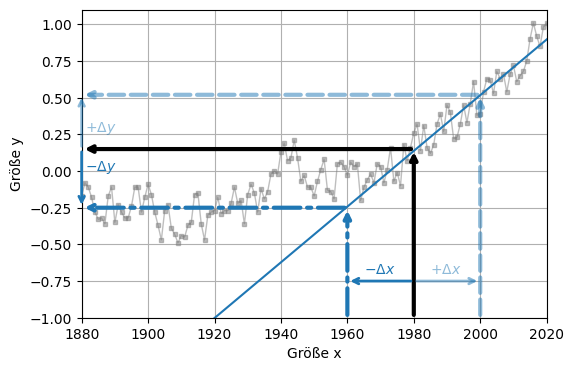

In [1]:
#Benötigte Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(6,4)) # Plot-Größe
plt.rcParams['font.size'] = 10; # Schriftgröße

link = 'data/graph.csv' # Beispieldatei mit Klimadaten
global_mean = pd.read_csv(link, header = 1) # Daten einlesen
global_mean["uncertainty"] = 0.25 #Messunsicherheiten abschätzen, hier 0.25K Temperaturgenauigkeit angenommen

x=global_mean.loc[global_mean["Year"] >= 1980,"Year"]
y=global_mean.loc[global_mean["Year"] >= 1980,"No_Smoothing"]
y_err = global_mean.loc[global_mean["Year"] >= 1980,"uncertainty"]
model = np.polyfit(x, y, deg=1, w=1/y_err, cov=True) # 1. Wert = Anstieg , 2. Wert = Schnittpunkt mit y-Achse
y_model = model[0][0]*global_mean["Year"]+model[0][1] # Modell einer linearen Regression

plt.plot(global_mean["Year"],global_mean["No_Smoothing"], ls="-", lw=1, marker="s", ms=3, color="tab:gray", alpha=0.5, label="Werte");
plt.plot(global_mean["Year"],y_model, ls="-", lw=1.5, color="tab:blue", label=f"lineare Regression y=({model[0][0]*1000:.3f}+-{np.sqrt(model[1][0][0]*1000):.3f})1e-3*x+({model[0][1]:.3f}+-{np.sqrt(model[1][1][1]):.3f})");
plt.xlabel('Größe x')
plt.ylabel("Größe y")

plt.annotate("",xy=(1980, 0.15), xycoords='data',xytext=(1980, -1), textcoords='data',arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color = "k", lw=3), )
plt.annotate("",xy=(1880, 0.15), xycoords='data',xytext=(1980, 0.15), textcoords='data',arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color = "k", lw=3), )

plt.annotate("",xy=(1960, -0.25), xycoords='data',xytext=(1960, -1), textcoords='data',arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color = "tab:blue", lw=3, ls = '-.'), )
plt.annotate("",xy=(1880, -0.25), xycoords='data',xytext=(1960, -0.25), textcoords='data',arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color = "tab:blue", lw=3, ls = '-.'), )

plt.annotate("",xy=(2000, 0.52), xycoords='data',xytext=(2000, -1), textcoords='data',arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color = "tab:blue", lw=3, alpha = 0.5, ls = '--'), )
plt.annotate("",xy=(1880, 0.52), xycoords='data',xytext=(2000, 0.52), textcoords='data',arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color = "tab:blue", lw=3, alpha = 0.5, ls = '--'), )

# X-Arrows:
plt.annotate("",xy=(1960, -0.75), xycoords='data',xytext=(1980, -0.75), textcoords='data',arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color = "tab:blue", lw=2), )
plt.annotate('',xy=(2000, -0.75), xycoords='data',xytext=(1980, -0.75), textcoords='data',arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color = "tab:blue", lw=2, alpha = 0.5), )
plt.annotate(r'$-\Delta x$',xy=(1960, -0.75),xytext=(1965, -0.7), color="tab:blue")
plt.annotate(r'$+\Delta x$',xy=(2000, -0.75),xytext=(1985, -0.7), color="tab:blue", alpha = 0.5)

# Y-Arrows:
plt.annotate("",xy=(1880, -0.25), xycoords='data',xytext=(1880, 0.15), textcoords='data',arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color = "tab:blue", lw=2), )
plt.annotate('',xy=(1880, 0.52), xycoords='data',xytext=(1880, 0.15), textcoords='data',arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color = "tab:blue", lw=2, alpha = 0.5), )
plt.annotate(r'$-\Delta y$',xy=(1881, -0.),xytext=(1881, -0.), color="tab:blue")
plt.annotate(r'$+\Delta y$',xy=(1881, 0.27),xytext=(1881, 0.27), color="tab:blue", alpha = 0.5)

plt.xlim([1880,2020])
plt.ylim([-1.0,1.1])
plt.grid();

Das Intervall $\pm \Delta x = 20$ im Diagramm um 1980 herum wird durch *irgendeinen* funktionellen Zusammenhang $f(x)$ auf das Intervall $\Delta y$ abgebildet. Durch den Messwert $x_0 = 1980$ kann eine lineare Ausgleichsgerade gezogen werden, deren Steigung der Ableitung der Funktion in diesem Punkt entspricht, $df(x_0)/dx$. Anhand der Steigung der linearen Ausgleichsgeraden kann man den Fehler für $y$ direkt ablesen: $\Delta y \approx 0,375$. Man sieht jedoch in der Abbildung auch, dass diese Abschätzung umso schlechter wird, je größer $\Delta x$ ist. Je nach Funktionstyp müssen also auch höhere Ableitungen berücksichtigt werden (*Taylorentwicklung* von $f(x)$).

## Herleitung (Taylor)

Für eine allgemeine Funktion $f(x) = y(x)$ **einer** Zufallsgröße $x$ lässt sich die Frage
nach der Unsicherheit näherungsweise beantworten, wenn man
die Taylor-Entwicklung von $y$ an der Stelle $\bar x$ um deren Messabweichung $\Delta x$ herum entwickelt:

$$y = y(x)$$

$$\Rightarrow \quad y(x+\Delta x)= y(x) + \frac1{1!}\ \frac{dy(x)}{dx} \cdot \Delta x + \frac1{2!}\ \frac{d^2 y(x)}{d x^2}\cdot (\Delta x)^2 + \cdots$$

Da die Unsicherheit typischerweise eine kleine Größe ist, wird die Reihenentwicklung nach dem linearen Glied abgebrochen, da höhere Ordnung von $(\Delta x)^2$ recht klein werden. Damit ergibt sich die Näherung:

$$ y(x+\Delta x)= y(x) + \frac1{1!}\ \frac{dy(x)}{dx} \cdot \Delta x $$

$$\Rightarrow \quad y(x+\Delta x) - y(x) = \Delta y =  \frac{dy(x)}{dx} \cdot \Delta x$$

Diese Formel gilt, wenn das Messergebnis von einer einzelnen Zufallsgröße abhängt. Kommen weitere Messgrößen dazu, welche voneinander unabhängig sind, wird die entsprechende Reihenentwicklung verwendet, welche ebenfalls bis zum linearen Glied als Näherung für kleine $\Delta x$ angenommen werden kann:

$$y = y(x_1, x_2, ...)  \quad \Rightarrow \quad \Delta y = \frac{\partial y}{\partial x_1} \cdot \Delta x_1 + \frac{\partial y}{\partial x_2} \cdot \Delta x_2 + ...$$

wobei hier der Term $\frac{\partial y}{\partial x_1}$ die *partielle* Ableitung der Funktion $y(x_1, x_2, ...)$ nach der Größe $x_1$ bedeutet. Wird die partielle Ableitung nach $x_1$ berechnet, verhalten sich alle anderen Eingangsgrößen ($x_2, ...$) wie eine Konstante. 

```{warning}
Die nachfolgenden Gesetze sind nur bei hinreichender Linearität anwendbar, d.h. wenn sich die Funktion $y(x_1, x_2, ...)$ bei Änderung einer der Eingsangsgrößen $x_i$ im Bereich ihrer eigenen Unsicherheit $u_i$ nur hinreichend linear verändert. Andernfalls wird die Fehlerfortpflanzung aufwendiger (DIN1319).```

## Lineare Fehlerfortpflanzung

```{warning}
Diese Methoden werden nur für **systematische Fehler** angewendet.
```


### Bekanntes Vorzeichen
Ist das Vorzeichen der Messabweichung bekannt, müssen die Vorzeichen unbedingt berücksichtigt werden. Das Ergebnis wird anschließend um diesen *Offset* korrigiert und nicht mit dem $\pm$-Symbol, wie für Mess*unsicherheiten* üblich versehen.

Die allgemeine Formel aus dem vorangegangenen Kapitel ist gültig und die Messabweichung für $y$ berechnet sich zu:

$$\Rightarrow \quad \Delta y = \frac{\partial y}{\partial x_1} \cdot \Delta x_1 + \frac{\partial y}{\partial x_2} \cdot \Delta x_2 + ...$$

Wichtige Spezialfälle sind Summen, Differenzen, Produkte oder Quotienten von zwei Größen. Beachte hier, dass wir in diesem Kapitel Fehler **mit Vorzeichen** betrachten, das heißt wir wissen, in welche Richtung der Messwert abweicht. 

```{admonition} Spezialfälle
Die Spezialfälle vereinfachen sich aufgrund der Beträge zu folgenden Sachverhalten:

* Setzt sich die gesuchte Größe $y$ aus der **Addition** zweier unabhängigen Messwerte zusammen, so wird ihre Abweichung aus der Addition der Abweichungen der Einzelmessungen berechnet: 

$$y=x_1 + x_2 \Rightarrow  \color{blue}{
   \Delta y =  \Delta x_1 + \Delta x_2 } $$
   
* Setzt sich die gesuchte Größe $y$ aus der **Subtraktion** zweier unabhängigen Messwerte zusammen, so wird ihre Abweichung aus der Subtraktion der Abweichungen der Einzelmessungen berechnet: 

$$y=x_1 - x_2 \Rightarrow  \color{blue}{
   \Delta y =  \Delta x_1 - \Delta x_2 } $$
   
* Setzt sich die gesuchte Größe $y$ aus der **Multiplikation** zweier unabhängigen Messwerte zusammen, so wird ihre relative Abweichung aus der Addition der relativen Abweichungen der Einzelmessungen berechnet: 

$$y=x_1 \cdot x_2 \Rightarrow  \color{blue}{
   \frac{\Delta y}{y} =  \frac{\Delta x_1}{x_1} + \frac{\Delta x_2}{x_2} }$$

* Setzt sich die gesuchte Größe $y$ aus der **Division** zweier unabhängigen Messwerte zusammen, so wird ihre relative Abweichung aus der Subtraktion der relativen Abweichungen der Einzelmessungen berechnet: 

$$y=x_1 / x_2 \Rightarrow  \color{blue}{
   \frac{\Delta y}{y} =  \frac{\Delta x_1}{x_1} - \frac{\Delta x_2}{x_2} }$$
```   

Hierbei werden keine Fehlergrenzen (mit $\pm$) angegeben, sondern systematische Messabweichungen mit bekanntem Vorzeichen. Bei Fehlergrenzen und statischen Unsicherheiten, gelten andere Sacherverhalte (siehe nächsten Abschnitt)! Die Formeln gelten *nur*, wenn das Vorzeichen des Fehlers bekannt ist. Bei dieser Fehlerfortpflanzung können sich also Abweichungen ergänzen oder sogar *aufheben*, wie das folgende Beispiel zeigt.


```{admonition} Beispiel
:class: tip, dropdown
Eine Messgröße $x_1$ wird um 2% zu klein gemessen und Messgröße $x_2$ um 3% zu groß. 
* Bei der Multiplikation $y=x_1 \cdot x_2$ wird $y$ um 5% zu groß gemessen (2% + 3% = 5%).
* Bei der Division $y=x_1 / x_2$ wird $y$ um 1% zu klein gemessen (2% - 3% = -1%).
```

### Unbekanntes Vorzeichen (Maximalfehler)  <a id="SubSec-Fehlergrenzen"></a> 

Die Größe der Messabweichung eines Messgereätes ist zwar betragsmäßig bekannt, das Vorzeichen jedoch nicht. Somit sind nur die Grenzen dieser Abweichung bekannt. Die gesuchte Abweichung $\Delta y$ der Messgröße $y$ kann aber über denselben mathematischen Ansatz wie eben ermittelt werden, wobei wir annehmen, dass sich die Abweichungen im schlimmsten Fall bei ungünstigen Vorzeichenkombinationen zu einem **Maximalfehler** addieren:

$$\Delta y = \left| \frac{\partial y}{\partial x_1} \right| \cdot \Delta x_1+ \left|\frac{\partial y}{\partial x_2} \right| \cdot \Delta x_2 + \cdots$$

```{warning}
Auch wenn unbekannte Vorzeichen ebenfalls bei zufälligen Messunsicherheit auftreten, wird der Maximalfehler meist nur bei **systematischen** oder bei worst case Batrachtungen angewendet. 
```


```{admonition} Spezialfälle
Die Spezialfälle vereinfachen sich aufgrund der Beträge zu folgenden Sachverhalten:

* Setzt sich die gesuchte Größe $y$ aus der **Addition oder Subtraktion** zweier unabhängigen Messwerte zusammen, so wird ihre Abweichung aus der Addition der Abweichungen der Einzelmessungen berechnet: 

$$y=x_1 \pm x_2 \Rightarrow  \color{blue}{
   \Delta y =  \Delta x_1 + \Delta x_2 } $$
   
* Setzt sich die gesuchte Größe $y$ aus der **Multiplikation oder Division** zweier unabhängigen Messwerte zusammen, so wird ihre relative Abweichung aus der Addition der relativen Abweichungen der Einzelmessungen berechnet: 

$$y=x_1 \cdot x_2 \quad \textrm{oder} \quad y=x_1 / x_2 \Rightarrow  \color{blue}{
   \frac{\Delta y}{y} =  \frac{\Delta x_1}{x_1} + \frac{\Delta x_2}{x_2} }$$   
```



## Gauß'sche Fehlerfortpflanzung <a id="SubSec-Fehlerfortpflanzung_bei_unabhängigen_Unsicherheiten"></a> 

### Zufällige unabhängige Unsicherheiten
Haben wir nun den Fall, dass sich die gesuchte Größe $y$ aus mehreren **voneinander unabhängigen** Eingangsgrößen $\bar x_1, \bar x_2, ...$ und deren Unsicherheiten $u_1, u_2, ...$ zusammensetzt, werden jetzt, wie bei der Berechnung der Standardunsicherheit, die *quadrierten* Beiträge der Einzelunsicherheiten addiert werden:

$$u_y = \sqrt{\left (\frac{\partial y}{\partial x_1} \cdot u_1 \right)^2 +\left (\frac{\partial y}{\partial x_2} \cdot u_2 \right)^2 +\cdots}$$

Dies nennt sich auch das **Gauß'sche Fehlerfortpflanzungsgesetz** und wird bei Unsicherheiten, aber nicht bei systematischen Messabweichungen / Fehlern verwendet. 

```{admonition} Spezialfälle
Die Spezialfälle vereinfachen sich aufgrund der Beträge zu folgenden Sachverhalten:


* Setzt sich die gesuchte Größe $y$ aus der **Addition oder Subtraktion** zweier unabhängigen Messwerte zusammen, so wird ihre quadrierte Unsicherheit aus der Addition der quadrierten Unsicherheiten der Einzelmessungen berechnet: 

$$y=\bar x_1 \pm \bar x_2 \Rightarrow  \color{blue}{
   u_y^2 =  u_1^2 + u_2^2 } $$
   
* Setzt sich die gesuchte Größe $y$ aus der **Multiplikation oder Division** zweier unabhängigen Messwerte zusammen, so wird ihre relative quadrierte Unsicherheit aus der Addition der relativen quadrierten Unsicherheiten der Einzelmessungen berechnet: 

$$y=\bar x_1 \cdot \bar x_2 \quad \textrm{oder} \quad y=\bar x_1 / \bar x_2 \Rightarrow  \color{blue}{
   \left(\frac{u_y}{y}\right)^2 =  \left(\frac{u_1}{\bar x_1}\right)^2 + \left(\frac{u_2}{\bar x_2} \right)^2}$$  
   
```
   
```{admonition} Beispiel aus dem Video
:class: dropdown, tip

Es soll der elektrische Widerstand eines $l = 100\,\mathrm m$-langen Spulendrahtes mittels Messungen ermittelt werden:

$$R = \rho \cdot \frac{l}{\frac{\pi d^2}{4}}$$

wobei $\rho$ der spezifische Widerstand und $d$ der Durchmesser des Drahtes sind. 
Beide Größen wurden mehrmals gemessen, wobei unterschiedliche Messwerte herausgekommen sind, aus denen Mittelwerte und Standardabweichungen berechnet worden sind:

$$\rho = \bar \rho \pm \Delta \rho = (1{,}7 \cdot 10^{-6} \pm 3 \cdot 10^{-8})\,\mathrm{\Omega m}$$

$$d = \bar d \pm \Delta d = (87 \cdot 10^{-5} \pm 3 \cdot 10^{-6})\,\mathrm{m}$$

Aus dem Mittelwerten wird die gesuchte Größe $R$ berechnet:

$$\bar R = \bar\rho \cdot \frac{4\cdot l}{\pi \bar d^2} = \frac{1{,}7 \cdot 10^{-6}\,\mathrm{\Omega m} \cdot 4 \cdot 100\,\mathrm m}{\pi \cdot (87 \cdot 10^{-5}\,\mathrm m)^2} = 285{,}97\,\mathrm\Omega$$

Die Unsicherheit wird mittels Gauß berechnet:

$$\Delta R = \sqrt{ \left( \frac{\partial R}{\partial \rho} \cdot \Delta \rho \right)^2 + \left( \frac{\partial R}{\partial d} \cdot \Delta d\right)^2}$$

Die Ableitungen sollte man vorher separat berechnen:

$$\frac{\partial R}{\partial \rho} = \frac{4 \cdot l}{\pi d^2}$$

$$\frac{\partial R}{\partial d} = -\frac{\rho \cdot 8 \cdot l}{\pi d^3}$$

Und alle Formeln und Größen einsetzen:

\begin{align*}
\Delta R &= \sqrt{ \left( \frac{4 \cdot l}{\pi d^2} \cdot \Delta \rho \right)^2 + \left( -\frac{\rho \cdot 8 \cdot l}{\pi d^3} \cdot \Delta d\right)^2}\\
&= \sqrt{ \left( \frac{4 \cdot 100\,\mathrm m}{\pi (87 \cdot 10^{-5}\,\mathrm m)^2} \cdot 3 \cdot 10^{-8}\,\mathrm{\Omega m} \right)^2 + \left( -\frac{1{,}7 \cdot 10^{-6}\,\mathrm{\Omega m} \cdot 8 \cdot 100\,\mathrm m}{\pi (87 \cdot 10^{-5}\,\mathrm m)^3} \cdot 3 \cdot 10^{-6}\,\mathrm{m}\right)^2}\\
&= 5{,}418\,\mathrm\Omega\\
\end{align*}

Angabe des Endergebnisses:

$$R = (285{,}97 \pm 5{,}418)\,\mathrm\Omega $$

Dies ist die allgemein übliche Herangehensweise. In diesem Fall hätte man aber auch eine Variante des Spezialfalls für Division anwenden können:

$$ \left(\frac{u_y}{y}\right)^2 =  \left(\frac{u_1}{\bar x_1}\right)^2 + \left(\frac{u_2}{\bar x_2} \right)^2$$

wobei hier bei dem Exponenten von $d$ ein Faktor $2$ berücksichtigt werden muss, da $d^2$ (bzw. $d^{-2}$) in der Formal auftritt:

\begin{align*}
\left(\frac{\Delta R}{R}\right)^2 &=  \left(\frac{\Delta \rho}{\bar \rho}\right)^2 + \left(\frac{2 \cdot \Delta d}{\bar d} \right)^2\\
& =  \left(\frac{3 \cdot 10^{-8}}{1{,}7 \cdot 10^{-6}}\right)^2 + \left(\frac{2 \cdot 3 \cdot 10^{-6}}{87 \cdot 10^{-5}} \right)^2\\
&= 0{,}000359\\
\end{align*}

Aufgelöst nach $\Delta R$ erhält man ebenfalls:

$$\Delta R = \sqrt{0{,}000359 \cdot (285{,}97\,\Omega)^2} = 5{,}418$\,\Omega$$


```

In [2]:
import numpy as np

drho = 3e-8
rho=1.7e-6
dd = 3e-6
d=87e-5
l = 100

R = rho*4*l/(np.pi * d**2)
print('R = ', R)

# Allgemein:
dRdrho = 4*l/(np.pi*d**2)
dRdd = - rho*8*l/(np.pi*d**3)

dR_1 = np.sqrt((dRdrho * drho)**2 + (dRdd * dd)**2)
print('dR = ', dR_1)

# Divisions-Spezialfall:
rho_relative = drho/rho
d_relative = 2*dd/d

dRR2 = rho_relative**2 + d_relative**2
dR_2 = np.sqrt(dRR2 * R**2)

print('(dR/R)^2 = ', dRR2)
print('dR = ', dR_2)

R =  285.97003911345973
dR =  5.418216235738347
(dR/R)^2 =  0.0003589811108048171
dR =  5.418216235738347


### Zufällige abhängige Variablen <a id="SubSec-Fehlerfortpflanzung_bei_korrelierten_Unsicherheiten"></a> 

::::::{margin}
:::::{grid}
::::{grid-item-card}
:class-header: bg-light
Pearson Korrelationskoeffizient berechnen - Statistik einfach erklärt! (Studyflix)

<iframe width="200" height="113" src="https://www.youtube.com/embed/yJewCQIxECs?si=DLzZkExnIMZNAg5A" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
::::
:::::
::::::

Häufig liegt in der Messtechnik der Fall vor, dass wir voneinander unabhängige Messungen betrachten und diese zu unserer gesuchten Messgröße kombinieren. Teilweise können aber auch Messungen beobachtet werden, welche eine Abhängigkeit voneinander aufweisen. In diesem Fall spricht man von **Korrelationen** zwischen Messgrößen und ein **Kovarianz-Term** muss berücksichtigt werden! 

Der Korrelationskoeffizient $r$ kann nur Werte zwischen +1 und -1 annehmen, wobei +1 einen perfekten positiven Zusammenhang und -1 einen perfekten negativen Zusammenhang beschreiben. Ist $r = 0$, so gibt es keinen Zusammenhang zwischen den betrachteten Variablen, sie sind also unabhängig voneinander. 

```{warning}
Der Korrelationskoeffizient $r$ erkennt nur lineare Zusammenhänge. Sind zwei Variablen unkorreliert, kann immer noch ein nicht-linearer Zusammenhang, z.B. exponentiell oder quadratisch, zwischen ihnen bestehen. 
```

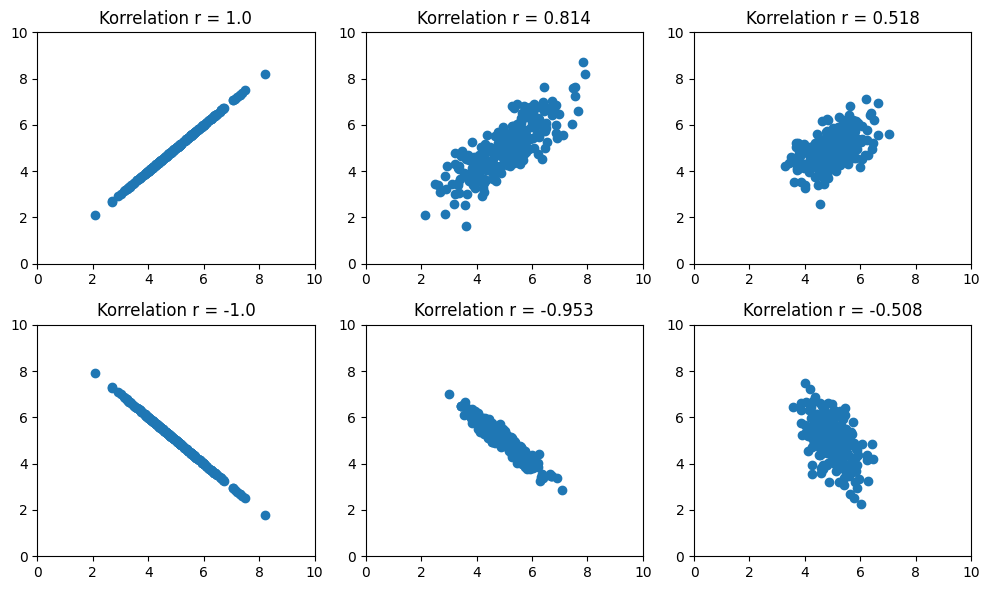

In [3]:
def scatterplot(x, y): 
    rho = np.corrcoef(m_1,m_2)[1,0]
    plt.scatter(x, y, color="tab:blue")
    plt.title('Korrelation r = ' + str(round(rho,3)))
    plt.xlim([0,10])
    plt.ylim([0,10])
    
plt.figure(figsize=(10,6)) # Plot-Größe
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
#plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße

# Zufallszahlen erzeugen
u_1 = np.random.randn(250)
u_2 = np.random.randn(250)
u_g = np.random.randn(250)

# richtige Werte
r_1 = 5.0
r_2 = 5.0
    
# Plot 1:
# einzelne und gemeinsame Unsicherheit
s_1, s_2, s_g = 0.0, 0.0, 1.0
# Simulierte Messwerte erstellen
m_1 = r_1 + s_1*u_1 + s_g*u_g
m_2 = r_2 + s_2*u_2 + s_g*u_g
plt.subplot(2,3,1)
scatterplot(m_1, m_2)

# Plot 2:
# einzelne und gemeinsame Unsicherheit
s_1, s_2, s_g = 0.5, 0.5, 1.0
# Simulierte Messwerte erstellen
m_1 = r_1 + s_1*u_1 + s_g*u_g
m_2 = r_2 + s_2*u_2 + s_g*u_g
plt.subplot(2,3,2)
scatterplot(m_1, m_2)

# Plot 3:
# einzelne und gemeinsame Unsicherheit
s_1, s_2, s_g = 0.5, 0.5, 0.5
# Simulierte Messwerte erstellen
m_1 = r_1 + s_1*u_1 + s_g*u_g
m_2 = r_2 + s_2*u_2 + s_g*u_g
plt.subplot(2,3,3)
scatterplot(m_1, m_2)

# Plot 4:
# einzelne und gemeinsame Unsicherheit
s_1, s_2, s_g = 0.0, 0.0, 1.0
# Simulierte Messwerte erstellen
m_1 = r_1 + s_1*u_1 + s_g*u_g
m_2 = r_2 + s_2*u_2 - s_g*u_g
plt.subplot(2,3,4)
scatterplot(m_1, m_2)

# Plot 5:
# einzelne und gemeinsame Unsicherheit
s_1, s_2, s_g = 0.2, 0.1, .7
# Simulierte Messwerte erstellen
m_1 = r_1 + s_1*u_1 + s_g*u_g
m_2 = r_2 + s_2*u_2 - s_g*u_g
plt.subplot(2,3,5)
scatterplot(m_1, m_2)

# Plot 6:
# einzelne und gemeinsame Unsicherheit
s_1, s_2, s_g = 0.2, 0.8, 0.5
# Simulierte Messwerte erstellen
m_1 = r_1 + s_1*u_1 + s_g*u_g
m_2 = r_2 + s_2*u_2 - s_g*u_g
plt.subplot(2,3,6)
scatterplot(m_1, m_2)

plt.tight_layout()
plt.show()

Die Berechnung des Korrelationskoeffizienten zwischen zwei Variablen, $x_1$ und $x_2$, kann auf zwei verschiedene Arten erfolgen:

$$r = \frac{\sum_{i=1}^N (x_{1,i}-\overline x_1)\cdot (x_{2,i}-\overline x_2)}{\sqrt{\sum_{i=1}^N (x_{1,i}-\overline x_1)^2} \cdot \sqrt{ \sum_{i=1}^N (x_{2,i}-\overline x_2)^2}}$$

$$r = \frac{\sum_{i=1}^N x_{1,i}x_{2,i} - N\cdot \bar x_1 \bar x_2}{\sqrt{\sum_{i=1}^N x_{1,i}-N \bar x_1^2} \cdot \sqrt{ \sum_{i=1}^N x_{2,i}-N \bar x_2^2}} $$

Eine alternative Berechnung des Koeffizienten ergibt sich aus der sogenannten Kovarianz-Matrix, die durch die jeweiligen Standardabweichungen der beiden Variablen normiert wird:

$$r = \frac{\mathrm{cov}_{x_1x_2}}{s_{x_1} \cdot s_{x_2}}$$

Für mehr als zwei Variablen ergibt sich eine komplexe Matrix:

$$\bigl( r_{ij} \bigr) \,=\, \Bigl (\frac{ \mathrm{S}^2_{ij} } {s_i\,s_j} \Bigr)$$

die alle möglichen 2er-Kombinationen zwischen den verschiedenen Variablen enthält.

Bei unabhängigen Messungen ist die Kovarianz null:

$$\mathrm{cov}(x_1, x_2) = 0$$

In korrelierten Messungen treten gemeinsame Unsicherheiten auf, insbesondere wenn alle Messungen eine gemeinsame systematische Unsicherheit haben:

$$\mathrm{cov}(x_1, x_2) = \left< x_1 x_2 \right> - \left< x_1 \right>\left< x_2 \right>$$

Diese gemeinsame Unsicherheit führt dazu, dass Abhängigkeiten zwischen den gemessenen Werten $x_1$ und $x_2$ auftreten. Zum Beispiel, wenn $x_1$ zu groß ist, erhöht sich die Wahrscheinlichkeit, dass auch $x_2$ zu groß ist, was als positive Korrelation bezeichnet wird. Umgekehrt würde eine negative Korrelation bedeuten, dass ein zu großer Wert von $x_1$ wahrscheinlicher ist, wenn $x_2$ zu klein ist.

Unabhängige Variablen haben keinen Einfluss aufeinander, und in diesem Fall ist die Korrelation genau null.

```{warning}
Es ist wichtig zu beachten, dass die Kovarianz von der Skalierung abhängt und daher weniger geeignet ist, um Größen zu vergleichen. Der Korrelationskoeffizient ist hingegen normiert und dient als Maß für Korrelationen, insbesondere für lineare Korrelationen. Es ist jedoch Vorsicht geboten, da ein hoher Korrelationskoeffizient nicht unbedingt auf eine starke Korrelation hinweist, da Ausreißerwerte den Wert beeinflussen können.
```

Das **Gauß'sche Fehlerfortpflanzungsgesetz** muss nun erweitert werden, um die Kovarianzen oder die Korrelationskoeffizienten zwischen jeweils zwei Größen für alle $n$ Messgrößen zu berücksichtigen.

Wenn eine Messgröße $y$ aus $n$ fehlerbehafteten Größen $x_1 \pm u_1, x_2 \pm u_2, \ldots, x_n \pm u_n$ zusammengesetzt ist (die Mittelwertschreibweise $\bar x_i$ wurde hier der Übersichtlichkeit halber weggelassen), gilt für ihre Unsicherheit:

$$u_y=\sqrt{\underbrace{\sum_{i=1}^n\left(\frac{\partial y}{\partial x_i}\cdot u_i\right)^2}_{\mathrm{wie~oben}}+ 2\underbrace{\sum_{i=1}^{n-1}\sum_{k=i+1}^n\frac{\partial y}{\partial x_i}\ \frac{\partial y}{\partial x_k}\cdot \mathrm{cov}(x_i, x_k)}_{\mathrm{Korrelationsterme}}}$$

```{admonition} Spezialfälle
Die Spezialfälle vereinfachen sich aufgrund der Beträge zu folgenden Sachverhalten:

* Addition und Subtraktion zweier korrelierter Messwerte führt zu folgendem Fehlerfortpflanzungsgesetz:

$$y=x_1 \pm x_2 \Rightarrow \color{blue}{
   {u_y}^2 = {u_1}^2 + {u_2}^2 \pm 2\, \mathrm{cov}(x_1,x_2) } $$
   
* Multiplikation oder Division zweier korrelierter Messwerte führt zu folgendem Fehlerfortpflanzungsgesetz:

$$y=x_1 \cdot  x_2 {\rm ~oder~} y = \frac{x_1}{x_2}$$

$$\Rightarrow \color{blue} {
    \left( \frac{u_y} {y} \right)^2 \simeq 
    \left( \frac{u_1} {x_1} \right)^2  
  + \left( \frac{u_2} {x_2} \right)^2
   \pm 2\frac{\mathrm{cov}(x_1,x_2)}{x_1 x_2} }$$


* der spezielle Fall für $y = f(x_1, x_2, ... x_n)$ und **100% abhängige (100% korrelierte)** Variablen:

$$u_{y}= \displaystyle \sum_{i=1}^n
 \left| \frac{\partial y}{\partial x_i} \right| u_{i}$$

```

```{admonition} Beispiel: Differentielle Datenübertragung 
:class: tip, dropdown
Man nehme zwei Messwerte $x_1$ und $x_2$ deren Erwartungswerte und Unsicherheiten jeweils identisch sind, z.B. $\bar x_1 = \bar x_2 = 10$ mit $u_1 = u_2 = 1$. Die zu ermittelnde Messgröße wird über folgende Relation berechnet: $y = \bar x_1 - \bar x_2$
- Das Ergebnis für $r = 0$, d.h. **unabhängige** Messwerte, der kombinierten Messunsicherheit für $y$ beträgt $u_y = 1{,}4$
- Das Ergebnis für $r = 1$, d.h. **korrelierte** Messwerte, der kombinierten Messunsicherheit für $y$ beträgt $u_y = 0{,}0$

Dieses Beispiel findet häufig Anwendung im Bereich der Signalübertragung und ist unter der Bezeichnung **differentielle Signalübertragung** bekannt. Neben dem eigentlichen Signal, $x_1$ wird hierbei ein zweites, invertiertes Signal mitübertragen, $x_2 = -x_1$. Da alle Störungen innerhalb der gleichen Übertragungsstrecke fast vollständig korreliert sind, heben sich diese am Ende auf. Das Nutzsignal erhält man zurück, indem man folgende Signalkombination berechnet: $y = 0{,}5\cdot (x_1 - x_2)$. Aufgrund des hohen Korrelationsgrades der einzelnen Signalkomponenten ist die Unsicherheit des extrahierten Signal sehr klein: $u_y \simeq 0$.
```